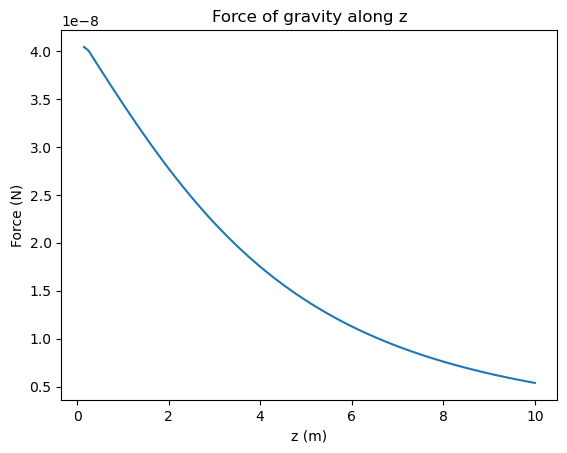

In [33]:
import numpy as np 
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

N = 100  # Number of Gaussian points
L = 10   # Side length of the sheet (m)
a = -L/2 
b = L/2
mass_sheet = 10000.  # 10 metric tonnes = 10000 kg

# Constants 
G = 6.67430e-11  # Newton's gravitational constant in m^3 kg^-1 s^-2
sigma = mass_sheet / (L*L)      # Surface mass density in kg/m^2 (calculated above)

# Defining the integrand function, which depends on x, y, and z
def F(x, y, z):
    return 1 / (x**2 + y**2 + z**2)**(3/2)

# Get Gaussian quadrature points and weights for x and y
x, wx = gaussxwab(N, a, b)
y, wy = gaussxwab(N, a, b)

# Set up z points over which the force will be evaluated
z_values = np.linspace(0.15, 10, N)  # Avoid z=0 to prevent singularity

# Initialize result list to store the force for each z
forces = []

# Loop over z points
for z in z_values:
    integral = 0.0
    # Double quadrature over x and y
    for i in range(N):
        for j in range(N):
            integral += wx[i] * wy[j] * F(x[i], y[j], z)
    # Multiply by constants G, sigma, and z
    force_z = G * sigma * z * integral
    forces.append(force_z)

# Now, you can print or plot the results as needed
plt.plot(z_values, forces)
plt.xlabel('z (m)')
plt.ylabel('Force (N)')
plt.title('Force of gravity along z')
plt.show()
